# Histograma e Estatística de uma imagem

## Histograma de uma imagem

A imagem normalmente é composta de um grande número de pixels; hoje em dia,
celulares tiram fotografias com a resolução espacial que produz alguns milhões de pixels.
Uma das caracterizações ou "assinaturas" mais eficientes da imagem é seu histograma.

Estude o pequeno tutorial disponível em:

- [Tutorial - Histograma e Estatísticas](../master/tutorial_hist__stat_2.ipynb)
 e após
isto, plote com ``adshow(iaplot())`` o histograma da imagem a seguir:

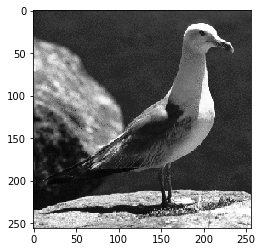

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import ia636 as ia
import numpy as np

f = mpimg.imread('../data/gull.pgm')
plt.imshow(f,cmap='gray');

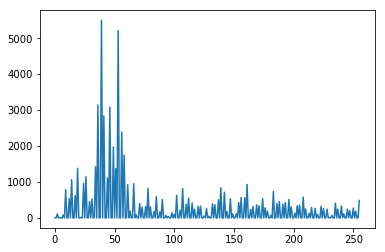

In [2]:
h = np.bincount(f.ravel())
plt.plot(h);

## Uso do matplotlib no Adessowiki

O uso do `iaplot` é para situações simples, com poucas opções de plotagem. Para se plotar gráficos mais sofisticados,
é possível se utilizar o `matplotlib` diretamente. Veja aqui neste breve tutorial como fazer:

- `master:tutorial_matplotlib Como utilizar o matplotlib no Adessowiki` 

## Estatísticas de uma imagem

Estude a função `ia636:iah2stats` que calcula diversas estatísticas da imagem a partir de
seu histograma. Observe que estas estatísticas podem ser obtidas tanto diretamente da imagem como do histograma.
A grande vantagem de calcular a estatística a partir do histograma é que o histograma é tipicamente um vetor de
256 elementos enquanto que a imagem pode ser de milhões de pixels. Assim, quando se precisa calcular diversos
valores estatísticos de uma imagem, calcula-se seu histograma e posteriormente seus valores estatísticos, calculados
a partir do histogram.

Veja a seguir o cálculo da média (`np.mean`) e do valor mediano (`np.median`) fazendo o cálculo diretamente na 
imagem.

In [ ]:
print('f.mean()=', f.mean())
print('np.median(f)=', np.median(f))

Procure utilizar a função iah2stats operando no histograma para calcular estes mesmos valores.

# utilize ia.iah2stats para calcular média e mediana da imagem da retina.tif

In [ ]:
ia.adshow(f,'input image')
h = ia.iahistogram(f)
v = ia.iah2stats(h)
print('mean =',v[0])
print('variance =',v[1])
print('skewness =',v[2])
print('kurtosis = ',v[3])
print('entropy = ',v[4])
print('mode = ',v[5])
print('percentil 1% = ',v[6])
print('percentil 10% = ',v[7])
print('percentil 50% = ',v[8])
print('percentil 90% = ',v[9])
print('percentil 99% = ',v[10])

## Histograma de imagens aleatórias

Calcule e plote os histogramas das imagens f1, f2 e f3 a seguir, dando uma justificativa para cada caso em relação ao formato do histograma.
Aproveite para estudar as funções de geração de dados aleatórios "randint", "shuffle" e "random.normal":

In [ ]:
import matplotlib.pyplot as plt

f1 = np.random.randint(0,256, (128,256)).astype(np.uint8)
ia.adshow( f1, 'f1')
h1 = ia.iahistogram(f1)
fig2 = plt.figure()
plt.bar( np.arange(h1.size), h1)
ia.adshow( ia.iafig2img(fig2), 'histograma de f1')

In [ ]:
f_2 = np.resize(np.arange(256, dtype=np.uint8), (128,256)) # imagem rampa
f2 = np.ravel(f_2)
np.random.shuffle(f2)
adshow(f2.reshape(f_2.shape), 'f2')
h2 = ia.iahistogram(f2)
fig3 = plt.figure()
plt.bar( np.arange(h2.size), h2)
adshow( ia.iafig2img(fig3), 'histograma de f2')

In [ ]:
f_3 = np.random.randn(128,256)
f3 = ia.ianormalize(f_3).astype(np.uint8)
adshow(f3, 'f3')
h3 = ia.iahistogram(f3)
fig4 = plt.figure()
plt.bar( np.arange(h3.size), h3)
adshow( ia.iafig2img(fig4), 'histograma de f3')

## Teste de autoavaliação

Faça o teste múltipla escolha a seguir para verificar os conhecimentos adquiridos com esta atividade.
O teste é para autoestudo e pode ser repetido várias vezes:

- `http://adessowiki.fee.unicamp.br/adesso-1/q/ae2-3/ Teste de autoestudo - Histograma e estatísticas de uma imagem`

## Referências
===========

- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html NumPy Reference: mean`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html NumPy Reference: median`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html NumPy Reference: random.randint`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html NumPy Reference: random.shuffle`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html NumPy Reference: random.normal`

## Referências n Toolbox

- `ia636:iahistogram iahistogram - calcula o histograma de uma imagem`
- `ia636:iah2stats iah2stats - calcula valores estatísticos de uma imagem a partir de seu histograma`
- `ia636:iafig2img iafig2img - mostra figuras do matplotlib como imagens prontas para adshow`